In [22]:
from pygeoinf.interval.fem_solvers import NativeFEMSolver
from pygeoinf.interval.laplacian_inverse_operator import LaplacianInverseOperator
from pygeoinf.interval.l2_functions import L2Function
from pygeoinf.interval.sobolev_space import Sobolev
from pygeoinf.interval.boundary_conditions import BoundaryConditions
from pygeoinf.interval.interval_domain import IntervalDomain
import numpy as np
import matplotlib.pyplot as plt

In [23]:
function_domain = IntervalDomain(0, 1)
bcs = BoundaryConditions(bc_type="dirichlet", left=0.0, right=0.0)
space = Sobolev(5, function_domain, 3, 'spectral', basis_type='fourier', boundary_conditions=bcs)

In [24]:
solver = NativeFEMSolver(function_domain=function_domain, dofs=100, boundary_conditions=bcs)
solver.setup()

<Axes: title={'center': 'Function on [0.0, 1.0]'}, xlabel='x', ylabel='f(x)'>

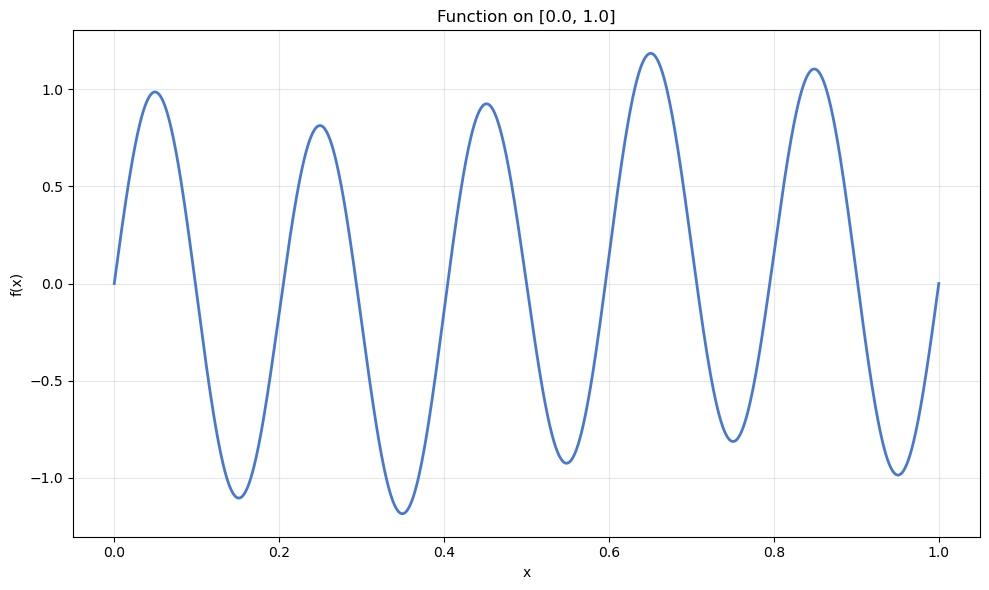

In [37]:
source_function = L2Function(space, evaluate_callable=lambda x: x*(x - 1)*np.sin(2 * np.pi * x) + np.sin(10*np.pi*x))
source_function.plot()

In [38]:
IL = LaplacianInverseOperator(space, dofs=100, solver_type='native')

LaplacianInverseOperator initialized with native solver, dirichlet(left=0.0, right=0.0) BCs


<Axes: title={'center': 'Function on [0.0, 1.0]'}, xlabel='x', ylabel='f(x)'>

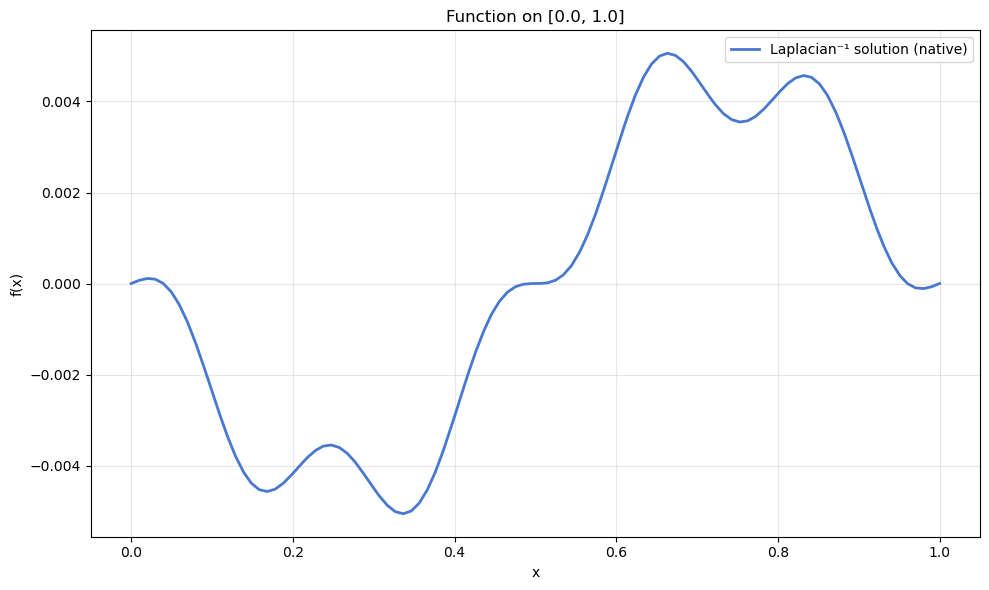

In [39]:
IL(source_function).plot()